In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import json
import datetime

In [4]:
nf=pd.read_csv('./flights181116023641.csv')
def lowp(cabin):
    j=json.loads(cabin.replace("'",'"'))
    if len(j)!=0:
        return min([float(p['adultprice']) for p in j])
    else:
        return np.nan

nf.loc[:,'lowprice']=nf.loc[:,'cabin'].apply(lowp)
nf.drop(columns=['Unnamed: 0','cabin','codeshare','codeshareinfo','rate','roundtripcabin','seginterval','stopname_en','stopname_zh'],inplace=True)
nf.sort_values(by=['arrdate','lowprice'],inplace=True)
def dsub(d):
    dt=datetime.datetime.strptime(str(d),'%Y%m%d')
    return (dt-datetime.datetime.strptime('20181115','%Y%m%d')).days
    
nf.loc[:,'nd']=nf.loc[:,'depdate'].apply(dsub)

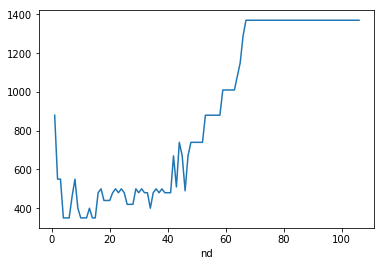

In [5]:
nf[nf['depport']=='CAN'].groupby('nd').agg(min)['lowprice'].plot()

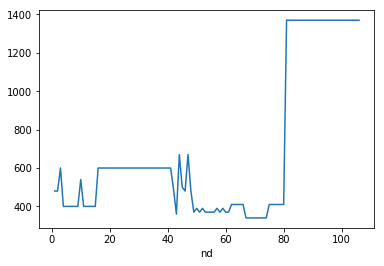

In [6]:
nf[nf['depport']=='CKG'].groupby('nd').agg(min)['lowprice'].plot()

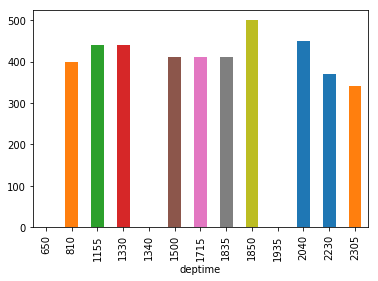

In [12]:
nf[ (nf['depport']=='CKG')].groupby('deptime').agg(min)['lowprice'].plot.bar()

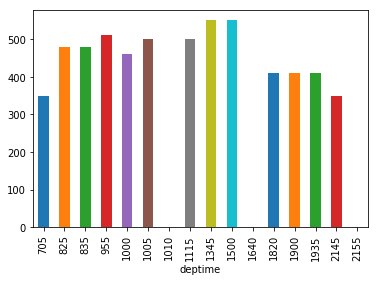

In [13]:
nf[ (nf['depport']=='CAN')].groupby('deptime').agg(min)['lowprice'].plot.bar()

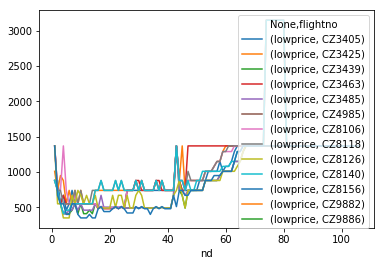

In [9]:
nf[nf['depport']=='CAN'][['flightno','nd','lowprice']].pivot('nd','flightno').plot()

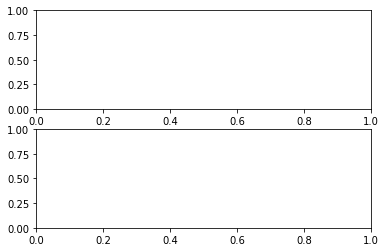

In [390]:
fig,ax=plt.subplots(2)

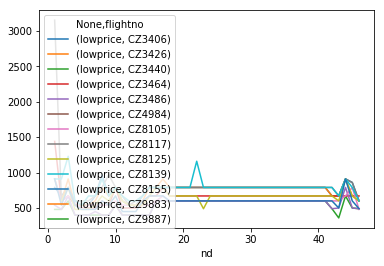

In [414]:
x=nf[nf['depport']=='CKG'][['flightno','nd','lowprice']].pivot('nd','flightno').plot()

In [407]:
fig=x.get_figure()

In [408]:
fig.savefig('f',figsize=(5000,5000))

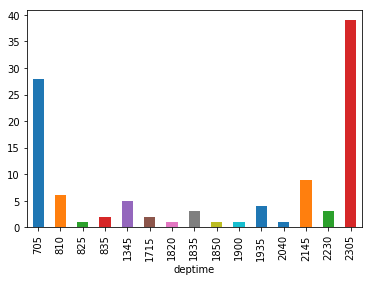

In [33]:
nf.sort_values(by='lowprice').groupby('nd')['deptime','flightno','lowprice','nd'].apply(lambda x:x[0:1]).groupby('deptime')['lowprice'].agg('count').plot.bar()

In [35]:
nf.sort_values(by='lowprice').groupby('nd').apply(lambda x:x[0:1])

,,airline,arrdate,arrivalTerminal,arrport,arrtime,departureTerminal,depdate,depport,deptime,flightno,meal,plane,stopnumber,term,timeduringflight,timeduringflight_en,lowprice,nd
nd,,,,,,,,,,,,,,,,,,,
1,24,CZ,20181117,T2,CAN,120,T3,20181116,CKG,2305,CZ3440,Y,32N,0,T3,2小时15分钟,2Hours 15Minutes,480.0,1
2,49,CZ,20181118,T2,CAN,35,T3,20181117,CKG,2230,CZ3486,Y,32E,0,T3,2小时5分钟,2Hours 5Minutes,480.0,2
3,62,CZ,20181119,T3,CKG,10,T2,20181118,CAN,2145,CZ8126,Y,32E,0,T2,2小时25分钟,2Hours 25Minutes,550.0,3
4,88,CZ,20181120,T3,CKG,10,T2,20181119,CAN,2145,CZ8126,Y,32E,0,T2,2小时25分钟,2Hours 25Minutes,350.0,4
5,114,CZ,20181121,T3,CKG,10,T2,20181120,CAN,2145,CZ8126,Y,32E,0,T2,2小时25分钟,2Hours 25Minutes,350.0,5
6,140,CZ,20181122,T3,CKG,10,T2,20181121,CAN,2145,CZ8126,Y,32E,0,T2,2小时25分钟,2Hours 25Minutes,350.0,6
7,180,CZ,20181123,T2,CAN,120,T3,20181122,CKG,2305,CZ3440,Y,32N,0,T3,2小时15分钟,2Hours 15Minutes,400.0,7
8,206,CZ,20181124,T2,CAN,120,T3,20181123,CKG,2305,CZ3440,Y,32N,0,T3,2小时15分钟,2Hours 15Minutes,400.0,8
9,231,CZ,20181125,T2,CAN,35,T3,20181124,CKG,2230,CZ3486,Y,32E,0,T3,2小时5分钟,2Hours 5Minutes,400.0,9


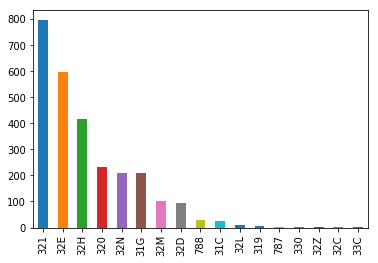

In [38]:
pd.value_counts(nf['plane']).plot.bar()

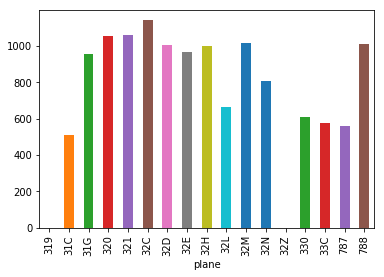

In [43]:
nf.groupby(['plane']).mean()['lowprice'].plot.bar()

In [62]:
nf

,airline,arrdate,arrivalTerminal,arrport,arrtime,departureTerminal,depdate,depport,deptime,flightno,meal,plane,stopnumber,term,timeduringflight,timeduringflight_en,lowprice,nd
16,CZ,20181116,T2,CAN,1535,T3,20181116,CKG,1330,CZ3406,Y,32M,0,T3,2小时5分钟,2Hours 5Minutes,790.0,1
2,CZ,20181116,T3,CKG,1215,T2,20181116,CAN,955,CZ3405,Y,32M,0,T2,2小时20分钟,2Hours 20Minutes,880.0,1
8,CZ,20181116,T3,CKG,2035,T2,20181116,CAN,1820,CZ8140,Y,32E,0,T2,2小时15分钟,2Hours 15Minutes,880.0,1
9,CZ,20181116,T3,CKG,2115,T2,20181116,CAN,1900,CZ3485,Y,787,0,T2,2小时15分钟,2Hours 15Minutes,880.0,1
10,CZ,20181116,T3,CKG,2200,T2,20181116,CAN,1935,CZ3439,Y,32N,0,T2,2小时25分钟,2Hours 25Minutes,880.0,1
14,CZ,20181116,T2,CAN,1015,T3,20181116,CKG,810,CZ8105,Y,32C,0,T3,2小时5分钟,2Hours 5Minutes,910.0,1
18,CZ,20181116,T2,CAN,1715,T3,20181116,CKG,1500,CZ8139,Y,32E,0,T3,2小时15分钟,2Hours 15Minutes,910.0,1
19,CZ,20181116,T2,CAN,1930,T3,20181116,CKG,1715,CZ3426,Y,321,0,T3,2小时15分钟,2Hours 15Minutes,910.0,1
22,CZ,20181116,T2,CAN,2245,T3,20181116,CKG,2040,CZ8155,Y,31C,0,T3,2小时5分钟,2Hours 5Minutes,910.0,1
5,CZ,20181116,T3,CKG,1600,T2,20181116,CAN,1345,CZ3425,Y,321,0,T2,2小时15分钟,2Hours 15Minutes,1010.0,1
